# **`WORKING TITLE`**
#### STAT 301 Project Group 22 Project Proposal
##### *By Janice Chan, Elias Khan, Davis Li, Daniel Yuan*

#### Introduction

One of our team members, Davis, is in Sauder studying business. He currently works at a Honda retailer selling cars. When we came across Kaggle, this car dataset stood out to us because it is directly correlated to what we’re interested in. As a salesman, it is important to gauge how much a potential buyer is willing to pay for a car in order to make the best suggestions to clients. This dataset helps us answer that question by providing input variables (demographics/attributes of a buyer) to predict the response variable (the price they paid for the car). 

##### Question:
As part of the exploratory data analysis and building the model, one of the key questions we want to ask is: “what attributes of a buyer can help us best predict how much a buyer is willing to pay for a car?”. To expand, as our project is based on prediction, we want to predict: “based on attributes of a buyer/consumer, how much would they be willing to pay for a car?”.

##### Dataset:
Our dataset is called “Car Sales Price Prediction” from Kaggle by Yashpal: https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction

The input variables for this dataset are: customer name, customer email, country, gender, age, annual salary, credit card debt, and net worth.

The response variable for this dataset is: the amount paid for a car by the buyer

There are a total of 500 observations we can work with. While we identify that a limitation is that the dataset is small, future implementations beyond the scope of this course can be to use bootstrapping. However for the purposes of this project, we recognize this limitation.  

##### Relevant Research
From previous studies, it is shown that certain attributes of buyers are correlated with how much they spend on a car.

The first scientific study we encountered by Chandra et al. (2013) states that there is a gender gap in terms of the premium paid for cars in relationship with age, where older buyers spend more on a car though this trend is more distinct in women; suggesting that gender and age of the buyer affects how much they pay for the car.
The second scientific study found that income had significant association with choice of car price range, and not gender or age, after sampling from 164 respondents in India (Rimple et al., 2015).

Although previous research indicate a relationship of buyers’ traits with car purchases, the first study does not look into the possible interactions or additionally considering multiple traits between income/wealth traits and gender/age traits together, and the second study is limited towards a particular small sample size of those in India. Hence why our research will expore in further detail and expand on previous studies to gain a better understanding of how these traits, along with others, may interplay with how much a buyer would spend on a car with a larger and more diverse dataset than the second study; providing a better model for prediction and knowledge of relationship between buyers and their car purchases.

#### Preliminary Exploratory Data Analysis

The first important step is to load in the libraries we will need to analyse the dataset:

In [1]:
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(cowplot)
library(broom)
library(faux)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


ERROR: Error in library(cowplot): there is no package called ‘cowplot’


Now we can load in the dataset:

In [2]:
raw_car_data <- read_csv("car_purchasing.csv")
head(raw_car_data)

Rows: 500 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): customer name, customer e-mail, country
dbl (6): gender, age, annual Salary, credit card debt, net worth, car purcha...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85172,62812.09,11609.381,238961.3,35321.46
Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87062,66646.89,9572.957,530973.9,45115.53
Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,1,43.15290,53798.55,11160.355,638467.2,42925.71
Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27137,79370.04,14426.165,548599.1,67422.36
Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31375,59729.15,5358.712,560304.1,55915.46
Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.82489,68499.85,14179.472,428485.4,56612.00


Before we begin analyzing the data, it's important to decide which columns are important for our research and whether or not the data is clean.

Our first course of action will be to change the names of columns so that there are no spaces or symbols like "-" that will hinder our ability to analyze the data.

In [3]:
colnames(raw_car_data) <- gsub(" ", "_", colnames(raw_car_data))
colnames(raw_car_data) <- gsub("-", "", colnames(raw_car_data))
head(raw_car_data)

customer_name,customer_email,country,gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85172,62812.09,11609.381,238961.3,35321.46
Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87062,66646.89,9572.957,530973.9,45115.53
Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,1,43.15290,53798.55,11160.355,638467.2,42925.71
Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27137,79370.04,14426.165,548599.1,67422.36
Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31375,59729.15,5358.712,560304.1,55915.46
Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.82489,68499.85,14179.472,428485.4,56612.00


Next we must change the gender column so that it is categorical, rather than numerical.

In [4]:
raw_car_data$gender[raw_car_data$gender == 0] <- "Male"
raw_car_data$gender[raw_car_data$gender == 1] <- "Female"
raw_car_data$gender = as.factor(raw_car_data$gender)

head(raw_car_data)

customer_name,customer_email,country,gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,Male,41.85172,62812.09,11609.381,238961.3,35321.46
Harlan Barnes,eu.dolor@diam.co.uk,Belize,Male,40.87062,66646.89,9572.957,530973.9,45115.53
Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,Female,43.15290,53798.55,11160.355,638467.2,42925.71
Jade Cunningham,malesuada@dignissim.com,Cook Islands,Female,58.27137,79370.04,14426.165,548599.1,67422.36
Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,Female,57.31375,59729.15,5358.712,560304.1,55915.46
Carla Hester,mi@Aliquamerat.edu,Liberia,Female,56.82489,68499.85,14179.472,428485.4,56612.00


Finally, we must remove the columns "customer name", "customer e-mail", and "country", as they will be not included in our research.

These columns vary far too much and it would be nearly impossible to make any meaningful remarks from them.

In [5]:
car_data <- raw_car_data %>% select(-customer_name, -customer_email, -country)
head(car_data)

gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Male,41.85172,62812.09,11609.381,238961.3,35321.46
Male,40.87062,66646.89,9572.957,530973.9,45115.53
Female,43.15290,53798.55,11160.355,638467.2,42925.71
Female,58.27137,79370.04,14426.165,548599.1,67422.36
Female,57.31375,59729.15,5358.712,560304.1,55915.46
Female,56.82489,68499.85,14179.472,428485.4,56612.00


Now we have clean data with only categorical and numerical values, we can begin analyzing the data.

We will first create a distribution of car purchase amounts to see how the amount people spend on cars varies overall.

In [6]:
mean_purchases = mean(car_data$car_purchase_amount) %>%
    round(digits = 2)
median_purchases = median(car_data$car_purchase_amount) %>%
    round(digits = 2)
sd_purchases = sd(car_data$car_purchase_amount) %>%
    round(digits = 2)

##### Table 1. Data Summary of Estimates (rounded)
| Mean car purchase amount | Median car purchase amount | Standard Deviation of car purchase amounts|
|------|--------|------|
| \$44209.80 | \$43997.78 | \$10773.18 |

In [7]:
quantile_purchases = quantile(car_data$car_purchase_amount) %>%
    round(digits = 2)

##### Table 2. Quantiles of Car Purchases (rounded)
| 0% | 25% | 50% | 75% | 100% |
|------|--------|------|------|------|
| 9000 | 37629.90 | 43997.78 | 51254.71 | 80000 |

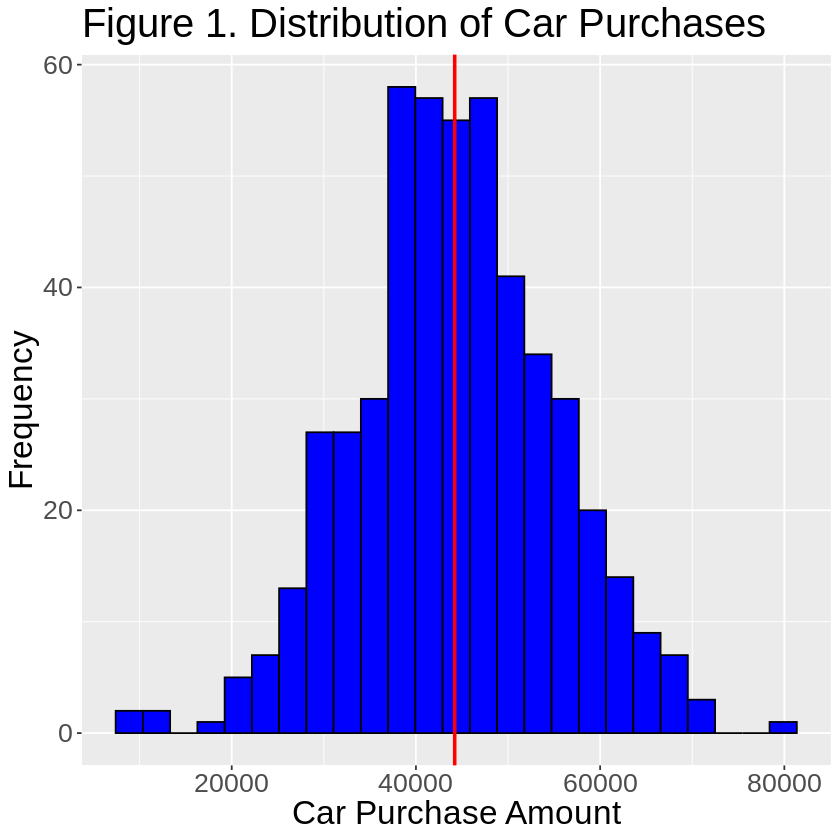

In [8]:
mean_purchase = mean(car_data$car_purchase_amount)

car_data %>% ggplot(aes(x=car_purchase_amount)) +
    geom_histogram(bins = 25, color = "black", fill = "blue") +
    geom_vline(xintercept= mean_purchase, color = "red", size = 1) +
    xlab("Car Purchase Amount") +
    ylab("Frequency") +
    ggtitle("Figure 1. Distribution of Car Purchases") +
    theme(text = element_text(size = 20))

These statistics combined with the visualisation above give us some valuable information about our data:

1. The distribution of car purchases is relatively symmetrical. We can see this visually, and we can confirm this by observing that the mean (44209.80 dollars) and the median (43997.78 dollars) are very close in value. This tells us that there are roughly the same amount of people that spend more than the mean than those who spend less.

2. 50% of the purchases lie between 37629.90 and 51254.71 dollars. This indicates to us that the amount that customers spend doesn't vary that much since the upper and lower quartile are relatively close. This is also shown in how high the peak of the distribution is compared to the outer sections of the distribution.

Now that we've become a bit more familiar with our response variable, we can begin seeing how other variables in the dataset compare and correlate with our response variable.

In [9]:
head(car_data)

gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Male,41.85172,62812.09,11609.381,238961.3,35321.46
Male,40.87062,66646.89,9572.957,530973.9,45115.53
Female,43.15290,53798.55,11160.355,638467.2,42925.71
Female,58.27137,79370.04,14426.165,548599.1,67422.36
Female,57.31375,59729.15,5358.712,560304.1,55915.46
Female,56.82489,68499.85,14179.472,428485.4,56612.00


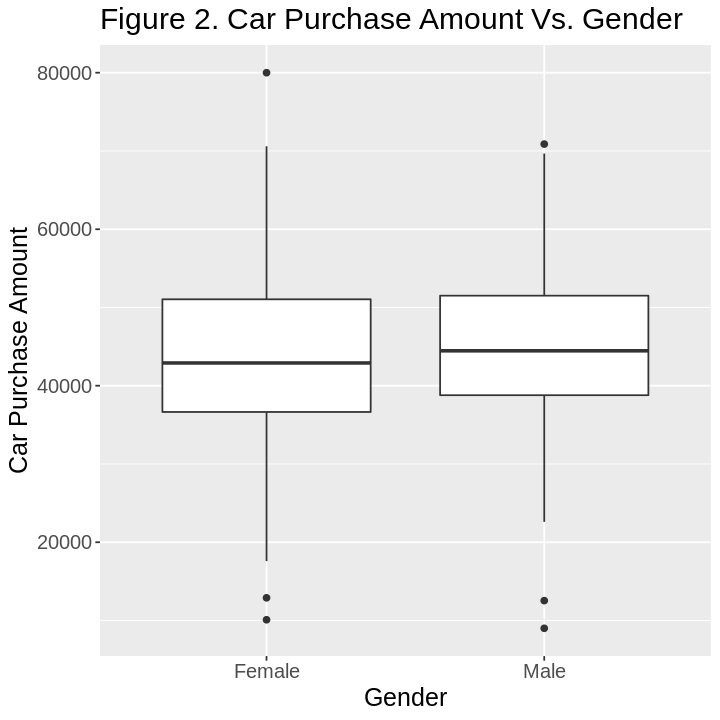

In [10]:
options(repr.plot.width = 6, repr.plot.height = 6)

gender_plot <- car_data %>% ggplot(aes(x = gender, y = car_purchase_amount)) +
                    geom_boxplot() +
    xlab("Gender")+
    ylab("Car Purchase Amount")+
    ggtitle("Figure 2. Car Purchase Amount Vs. Gender") +
    theme(text = element_text(size = 15))


gender_plot

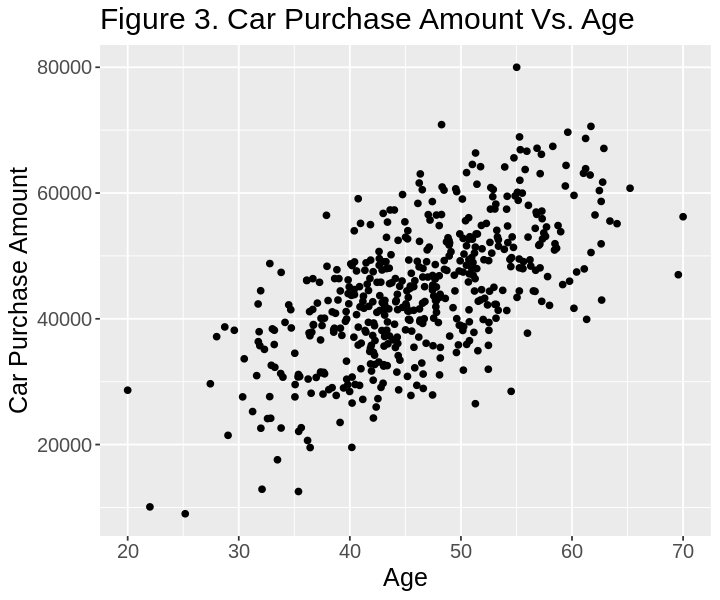

In [11]:
options(repr.plot.width = 6, repr.plot.height = 5)

age_plot <- car_data %>% ggplot(aes(x = age, y = car_purchase_amount)) +
                    geom_point() +
    xlab("Age")+
    ylab("Car Purchase Amount")+
    ggtitle("Figure 3. Car Purchase Amount Vs. Age") +
    theme(text = element_text(size = 15))

age_plot

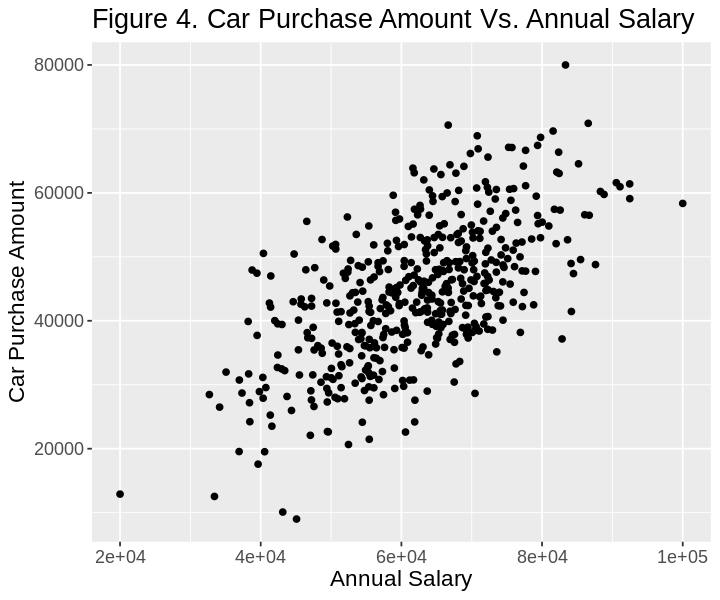

In [12]:
options(repr.plot.width = 6, repr.plot.height = 5)

annual_Salary_plot <- car_data %>% ggplot(aes(x = annual_Salary, y = car_purchase_amount)) +
                    geom_point() +
    xlab("Annual Salary")+
    ylab("Car Purchase Amount")+
    ggtitle("Figure 4. Car Purchase Amount Vs. Annual Salary") +
    theme(text = element_text(size = 13.5))

annual_Salary_plot

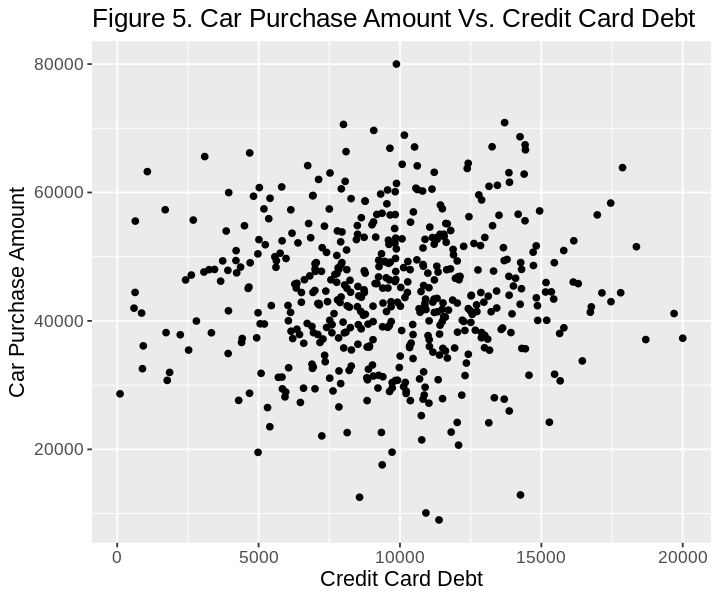

In [13]:
options(repr.plot.width = 6, repr.plot.height = 5)

credit_card_debt_plot <- car_data %>% ggplot(aes(x = credit_card_debt, y = car_purchase_amount)) +
                    geom_point() +
    xlab("Credit Card Debt")+
    ylab("Car Purchase Amount")+
    ggtitle("Figure 5. Car Purchase Amount Vs. Credit Card Debt") +
    theme(text = element_text(size = 13))

credit_card_debt_plot

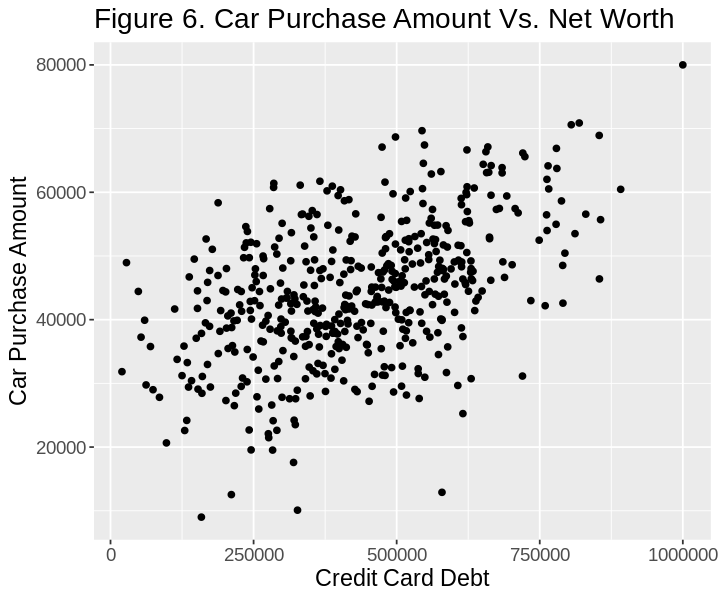

In [14]:
options(repr.plot.width = 6, repr.plot.height = 5)

net_worth_plot <- car_data %>% ggplot(aes(x = net_worth, y = car_purchase_amount)) +
                    geom_point() +
    xlab("Credit Card Debt")+
    ylab("Car Purchase Amount")+
    ggtitle("Figure 6. Car Purchase Amount Vs. Net Worth") +
    theme(text = element_text(size = 14))

net_worth_plot

After visualizing how different variables stack against car purchase amount, it is safe to say that we will definitely be able to make a solid predictive model for our response variable. More than one of these plots shows strong correlation to the response variable, which gives us the confidence to end our exploratory analysis of the data and begin preparing to fully analyze it and build models.

#### Methods

From our dataset, we will use multiple linear regression, assessing models and selecting the best variables for our predictive model using forward stepwise selection. We will evaluate models' predicted performance with the root mean squared error, assess goodness of fit with the adjusted R<sup>2</sup>, and select our predictive model by using the test MSE, C<sub>p</sub>, AIC or BIC. We will perform on a training set from our data, and use it to predict values in the test set to test our model's prediction performance.

Based on our previous research and preliminary data analysis, we expect age and annual salary to have the largest impact on car purchase amount, as we see a strong positive linear pattern in their plots (Figure 3 and 4). As well as net worth to have a slight effect as we see a slightly weaker linear pattern in Figure 6.

The strong correlation in age matches that seen in the study by Chandra et al. (2013), though our plot does not largely differ between genders in Figure 2, contrasting from their findings. Additionally, the strong correlation in annual salary matches that of in the research by Rimple et al. (2015). The net worth may also contribute closely in the same way while credit card debt being less related with income, thus not contradicting previous research (Rimple et al., 2015). Rimple et al. (2015) also show no relationship of gender and age with car purchases, thus we predict that although age may be significant, the relationship between gender and age may not, hence why we may see the contradiction with Figure 2 and the study by Chandra et al. (2013). However, our findings may counter their results and prove a more diverse and larger sample to represent a more accurate prediction (Rimple et al., 2015).

From our research, we expect to acheive an understanding of the attributes that contribute to car prices that consumers would spend on; gaining an optimal model of characteristics that effect car spendings. Moreover, our results will allow us to be able to estimate and predict reasonable car pricing for consumers. In turn, this may impact how car suggestions are offered depending on characteristics of the customer, and how automobile creators can decide cars to make with a certain budget and sale price for a particular audience. It provides greater insight on consumer behaviour, how to make the best choices as to which cars to offer consumers for their satisfaction, as well as a practical budget of cars to create for consumers that will perform well sales-wise. Our study may contribute for further research interests with the rise of electric cars and gas demands, economy impact by cars and gas, and environmental contributions by car uses with many who purchase cars. It can also be expanded in research with characteristics of cars (not just consumers) to discover car types and/or qualities that impact how much certain groups of consumers spend.

#### References

Chandra, A., Gulati, S., & Sallee, J. M. (2017). Who loses when prices are negotiated? an analysis of the new car market. *The Journal of Industrial Economics, 65*(2), 235-274. https://doi.org/10.1111/joie.12125.

Rimple, M., Srikant, M., Naseem, A., & Jitendra Kumar, M. (2015). A study of interaction of materialism and money attitude and its impact on car purchase. *Management & Marketing, 10*(3), 245-269. https://doi.org/10.1515/mmcks-2015-0017.

Yashpal. (n.d.). ANN - Car Sales Price Prediction, Version 1. Retrieved November 3, 2022 from https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction.